In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

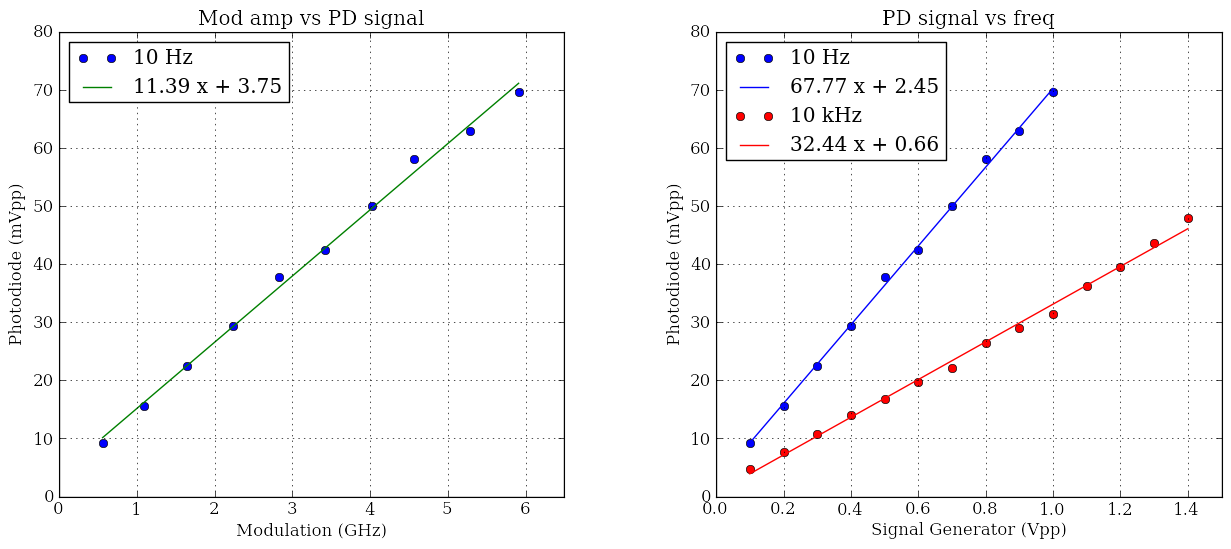

In [3]:
import numpy as np
ModAmp = np.array([0.56, 1.09, 1.65, 2.24, 2.83, 3.42, 4.03, 4.56, 5.28, 5.91])
PDAmp = np.array([9.2, 15.6, 22.5, 29.3, 37.8, 42.4, 50, 58, 62.8, 69.6])
SignalGeneratorAmp = np.array([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
SignalGeneratorAmp10kHz = np.array([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4])
PDAmp10kHz = np.array([4.68, 7.64, 10.8, 14.1, 16.8, 19.7, 22.1, 26.4, 29, 31.4, 36.2, 39.4, 43.6, 48])

from scipy import stats
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(ModAmp, PDAmp)
fit1 = slope1*ModAmp+intercept1
label1 = str(round(slope1,2))+' x + '+ str(round(intercept1,2))

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(SignalGeneratorAmp, PDAmp)
fit2 = slope2*SignalGeneratorAmp+intercept2
label2 = str(round(slope2,2))+' x + '+ str(round(intercept2,2))

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(SignalGeneratorAmp10kHz, PDAmp10kHz)
fit3 = slope3*SignalGeneratorAmp10kHz+intercept3
label3 = str(round(slope3,2))+' x + '+ str(round(intercept3,2))

import matplotlib.gridspec as gridspec
figure = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(ModAmp, PDAmp, marker='o',linestyle = 'none', label="10 Hz")
ax1.plot(ModAmp, fit1, label=label1)
ax1.set_xlim(0,6.5)
ax1.set_ylim(0,80)
ax1.set_xlabel('Modulation (GHz)')
ax1.set_ylabel('Photodiode (mVpp)')
ax1.legend(loc=0)
ax1.set_title("Mod amp vs PD signal") 
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(SignalGeneratorAmp, PDAmp, marker='o',color='b', linestyle = 'none', label="10 Hz")
ax2.plot(SignalGeneratorAmp, fit2, color='b', label=label2)
ax2.plot(SignalGeneratorAmp10kHz, PDAmp10kHz,marker='o', color='r',linestyle = 'none', label="10 kHz")
ax2.plot(SignalGeneratorAmp10kHz, fit3, color='r', label=label3)
ax2.set_xlim(0,1.5)
ax2.set_ylim(0,80)
ax2.set_xlabel('Signal Generator (Vpp)')
ax2.set_ylabel('Photodiode (mVpp)')
ax2.legend(loc=0)
ax2.set_title("PD signal vs freq")
ax2.grid(1)